In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

C:\Users\insapab\.conda\envs\AIMachine\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\insapab\.conda\envs\AIMachine\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\insapab\.conda\envs\AIMachine\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\insapab\.conda\envs\AIMachine\lib\site-packages\tensorf

In [2]:
csv_reader = pd.read_csv(r'C:\Users\insapab\Desktop\Python\Projects\Deep Learning based fall-detection\Week5\dataset_new.csv')

In [3]:
csv_reader.shape

(46087, 35)

In [4]:
csv_reader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46087 entries, 0 to 46086
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nose_xCoord           46087 non-null  float64
 1   nose_yCoord           46087 non-null  float64
 2   leftEye_xCoord        46087 non-null  float64
 3   leftEye_yCoord        46087 non-null  float64
 4   rightEye_xCoord       46087 non-null  float64
 5   rightEye_yCoord       46087 non-null  float64
 6   leftEar_xCoord        46087 non-null  float64
 7   leftEar_yCoord        46087 non-null  float64
 8   rightEar_xCoord       46087 non-null  float64
 9   rightEar_yCoord       46087 non-null  float64
 10  leftShoulder_xCoord   46087 non-null  float64
 11  leftShoulder_yCoord   46087 non-null  float64
 12  rightShoulder_xCoord  46087 non-null  float64
 13  rightShoulder_yCoord  46087 non-null  float64
 14  leftElbow_xCoord      46087 non-null  float64
 15  leftElbow_yCoord   

In [5]:
csv_reader.isnull().sum()

nose_xCoord             0
nose_yCoord             0
leftEye_xCoord          0
leftEye_yCoord          0
rightEye_xCoord         0
rightEye_yCoord         0
leftEar_xCoord          0
leftEar_yCoord          0
rightEar_xCoord         0
rightEar_yCoord         0
leftShoulder_xCoord     0
leftShoulder_yCoord     0
rightShoulder_xCoord    0
rightShoulder_yCoord    0
leftElbow_xCoord        0
leftElbow_yCoord        0
rightElbow_xCoord       0
rightElbow_yCoord       0
leftWrist_xCoord        0
leftWrist_yCoord        0
rightWrist_xCoord       0
rightWrist_yCoord       0
leftHip_xCoord          0
leftHip_yCoord          0
rightHip_xCoord         0
rightHip_yCoord         0
leftKnee_xCoord         0
leftKnee_yCoord         0
rightKnee_xCoord        0
rightKnee_yCoord        0
leftAnkle_xCoord        0
leftAnkle_yCoord        0
rightAnkle_xCoord       0
rightAnkle_yCoord       0
action                  0
dtype: int64

In [6]:
csv_reader.head()

,nose_xCoord,nose_yCoord,leftEye_xCoord,leftEye_yCoord,rightEye_xCoord,rightEye_yCoord,leftEar_xCoord,leftEar_yCoord,rightEar_xCoord,rightEar_yCoord,leftShoulder_xCoord,leftShoulder_yCoord,rightShoulder_xCoord,rightShoulder_yCoord,leftElbow_xCoord,leftElbow_yCoord,rightElbow_xCoord,rightElbow_yCoord,leftWrist_xCoord,leftWrist_yCoord,rightWrist_xCoord,rightWrist_yCoord,leftHip_xCoord,leftHip_yCoord,rightHip_xCoord,rightHip_yCoord,leftKnee_xCoord,leftKnee_yCoord,rightKnee_xCoord,rightKnee_yCoord,leftAnkle_xCoord,leftAnkle_yCoord,rightAnkle_xCoord,rightAnkle_yCoord,action
0,56.190699,296.234485,47.495736,304.506221,47.426405,290.856178,54.045254,317.089020,51.259983,284.022411,98.719044,335.695742,100.930659,276.349225,157.444074,355.579856,160.055622,263.549644,211.092471,340.496882,211.716219,265.121970,206.776064,326.265427,206.764836,283.173980,298.463096,327.059039,293.699426,291.596869,365.788908,335.774955,361.338563,295.586793,Sitting
1,58.070928,294.830473,50.438684,303.459697,50.413592,289.433166,53.729076,316.393431,54.849626,285.199219,93.755129,332.737840,98.838978,276.021288,157.410591,355.818210,160.001528,263.775434,210.561140,340.941379,213.042795,265.595944,207.230442,326.509203,206.469197,285.407934,296.631039,327.641395,295.514859,288.871951,366.269758,335.466869,361.195325,295.577829,Sitting
2,60.347484,293.276433,52.336790,302.564670,51.749057,286.061810,55.336751,314.123402,56.071776,283.196761,99.536148,335.110901,98.860682,274.606000,158.371219,355.589284,160.047945,263.605888,212.588271,340.294056,213.446340,265.688338,207.995333,326.541586,206.597968,285.700611,296.139735,327.478825,296.085122,288.846652,365.683480,335.637860,361.131568,295.322548,Sitting
3,60.354865,293.306309,52.357229,302.583683,51.762654,286.115169,55.277190,314.167158,56.112637,283.222878,99.445646,335.118755,98.875438,274.704609,158.187421,355.583027,160.002901,263.667578,212.520676,340.506925,213.198046,265.694996,208.177199,326.640903,206.658796,285.600408,296.232999,327.496065,296.276140,288.761548,365.609956,335.688486,361.174033,295.351302,Sitting
4,65.561807,293.525188,56.037613,300.768831,57.071169,285.863794,57.981080,313.506743,58.160196,281.245576,100.224719,332.374132,100.049734,274.107841,159.574954,355.690267,159.897382,264.676454,215.138463,339.589972,213.799203,266.681833,209.853354,325.764535,206.813333,286.422076,296.605081,327.646756,295.789608,288.276175,364.847562,335.984524,360.887404,295.336077,Sitting


In [7]:
csv_reader['action'].value_counts()

Walking    17352
Sitting    11635
Pushups    10470
Falling     6630
Name: action, dtype: int64

In [8]:
Sitting = csv_reader[csv_reader['action']=='Sitting'].head(6630).copy()
Pushups = csv_reader[csv_reader['action']=='Pushups'].head(6630).copy()
Walking = csv_reader[csv_reader['action']=='Walking'].head(6630).copy()
Falling = csv_reader[csv_reader['action']=='Falling'].head(6630).copy()
balance_data =  pd.DataFrame()
balance_data =  balance_data.append([Sitting, Pushups, Walking, Falling])
balance_data.shape

(26520, 35)

In [9]:
#Sitting = csv_reader[csv_reader['action']=='Sitting'].copy()
#Pushups = csv_reader[csv_reader['action']=='Pushups'].copy()
#Walking = csv_reader[csv_reader['action']=='Walking'].copy()
#Falling = csv_reader[csv_reader['action']=='Falling'].copy()
#balance_data =  pd.DataFrame()
#balance_data =  csv_reader.copy()
#balance_data.shape

In [10]:
balance_data['action'].value_counts()

Walking    6630
Pushups    6630
Sitting    6630
Falling    6630
Name: action, dtype: int64

In [11]:
balance_data.head()

,nose_xCoord,nose_yCoord,leftEye_xCoord,leftEye_yCoord,rightEye_xCoord,rightEye_yCoord,leftEar_xCoord,leftEar_yCoord,rightEar_xCoord,rightEar_yCoord,leftShoulder_xCoord,leftShoulder_yCoord,rightShoulder_xCoord,rightShoulder_yCoord,leftElbow_xCoord,leftElbow_yCoord,rightElbow_xCoord,rightElbow_yCoord,leftWrist_xCoord,leftWrist_yCoord,rightWrist_xCoord,rightWrist_yCoord,leftHip_xCoord,leftHip_yCoord,rightHip_xCoord,rightHip_yCoord,leftKnee_xCoord,leftKnee_yCoord,rightKnee_xCoord,rightKnee_yCoord,leftAnkle_xCoord,leftAnkle_yCoord,rightAnkle_xCoord,rightAnkle_yCoord,action
0,56.190699,296.234485,47.495736,304.506221,47.426405,290.856178,54.045254,317.089020,51.259983,284.022411,98.719044,335.695742,100.930659,276.349225,157.444074,355.579856,160.055622,263.549644,211.092471,340.496882,211.716219,265.121970,206.776064,326.265427,206.764836,283.173980,298.463096,327.059039,293.699426,291.596869,365.788908,335.774955,361.338563,295.586793,Sitting
1,58.070928,294.830473,50.438684,303.459697,50.413592,289.433166,53.729076,316.393431,54.849626,285.199219,93.755129,332.737840,98.838978,276.021288,157.410591,355.818210,160.001528,263.775434,210.561140,340.941379,213.042795,265.595944,207.230442,326.509203,206.469197,285.407934,296.631039,327.641395,295.514859,288.871951,366.269758,335.466869,361.195325,295.577829,Sitting
2,60.347484,293.276433,52.336790,302.564670,51.749057,286.061810,55.336751,314.123402,56.071776,283.196761,99.536148,335.110901,98.860682,274.606000,158.371219,355.589284,160.047945,263.605888,212.588271,340.294056,213.446340,265.688338,207.995333,326.541586,206.597968,285.700611,296.139735,327.478825,296.085122,288.846652,365.683480,335.637860,361.131568,295.322548,Sitting
3,60.354865,293.306309,52.357229,302.583683,51.762654,286.115169,55.277190,314.167158,56.112637,283.222878,99.445646,335.118755,98.875438,274.704609,158.187421,355.583027,160.002901,263.667578,212.520676,340.506925,213.198046,265.694996,208.177199,326.640903,206.658796,285.600408,296.232999,327.496065,296.276140,288.761548,365.609956,335.688486,361.174033,295.351302,Sitting
4,65.561807,293.525188,56.037613,300.768831,57.071169,285.863794,57.981080,313.506743,58.160196,281.245576,100.224719,332.374132,100.049734,274.107841,159.574954,355.690267,159.897382,264.676454,215.138463,339.589972,213.799203,266.681833,209.853354,325.764535,206.813333,286.422076,296.605081,327.646756,295.789608,288.276175,364.847562,335.984524,360.887404,295.336077,Sitting


In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
balance_data.iloc[:,34]=labelencoder_Y.fit_transform(balance_data.iloc[:,34].values)
balance_data.head()

,nose_xCoord,nose_yCoord,leftEye_xCoord,leftEye_yCoord,rightEye_xCoord,rightEye_yCoord,leftEar_xCoord,leftEar_yCoord,rightEar_xCoord,rightEar_yCoord,leftShoulder_xCoord,leftShoulder_yCoord,rightShoulder_xCoord,rightShoulder_yCoord,leftElbow_xCoord,leftElbow_yCoord,rightElbow_xCoord,rightElbow_yCoord,leftWrist_xCoord,leftWrist_yCoord,rightWrist_xCoord,rightWrist_yCoord,leftHip_xCoord,leftHip_yCoord,rightHip_xCoord,rightHip_yCoord,leftKnee_xCoord,leftKnee_yCoord,rightKnee_xCoord,rightKnee_yCoord,leftAnkle_xCoord,leftAnkle_yCoord,rightAnkle_xCoord,rightAnkle_yCoord,action
0,56.190699,296.234485,47.495736,304.506221,47.426405,290.856178,54.045254,317.089020,51.259983,284.022411,98.719044,335.695742,100.930659,276.349225,157.444074,355.579856,160.055622,263.549644,211.092471,340.496882,211.716219,265.121970,206.776064,326.265427,206.764836,283.173980,298.463096,327.059039,293.699426,291.596869,365.788908,335.774955,361.338563,295.586793,2
1,58.070928,294.830473,50.438684,303.459697,50.413592,289.433166,53.729076,316.393431,54.849626,285.199219,93.755129,332.737840,98.838978,276.021288,157.410591,355.818210,160.001528,263.775434,210.561140,340.941379,213.042795,265.595944,207.230442,326.509203,206.469197,285.407934,296.631039,327.641395,295.514859,288.871951,366.269758,335.466869,361.195325,295.577829,2
2,60.347484,293.276433,52.336790,302.564670,51.749057,286.061810,55.336751,314.123402,56.071776,283.196761,99.536148,335.110901,98.860682,274.606000,158.371219,355.589284,160.047945,263.605888,212.588271,340.294056,213.446340,265.688338,207.995333,326.541586,206.597968,285.700611,296.139735,327.478825,296.085122,288.846652,365.683480,335.637860,361.131568,295.322548,2
3,60.354865,293.306309,52.357229,302.583683,51.762654,286.115169,55.277190,314.167158,56.112637,283.222878,99.445646,335.118755,98.875438,274.704609,158.187421,355.583027,160.002901,263.667578,212.520676,340.506925,213.198046,265.694996,208.177199,326.640903,206.658796,285.600408,296.232999,327.496065,296.276140,288.761548,365.609956,335.688486,361.174033,295.351302,2
4,65.561807,293.525188,56.037613,300.768831,57.071169,285.863794,57.981080,313.506743,58.160196,281.245576,100.224719,332.374132,100.049734,274.107841,159.574954,355.690267,159.897382,264.676454,215.138463,339.589972,213.799203,266.681833,209.853354,325.764535,206.813333,286.422076,296.605081,327.646756,295.789608,288.276175,364.847562,335.984524,360.887404,295.336077,2


In [33]:
X_Raw=balance_data.iloc[:,0:34].values 
Y_label =balance_data.iloc[:,34].values
X_Raw.shape
X_Raw[0:120]

array([[ 56.19069855, 296.2344854 ,  47.49573637, ..., 335.7749548 ,
        361.3385628 , 295.5867925 ],
       [ 58.07092819, 294.8304728 ,  50.43868441, ..., 335.4668686 ,
        361.1953245 , 295.5778289 ],
       [ 60.34748406, 293.2764335 ,  52.33679027, ..., 335.6378602 ,
        361.131568  , 295.3225484 ],
       ...,
       [166.628734  , 335.160583  , 161.4007248 , ..., 355.3305387 ,
        365.1155384 , 275.2251388 ],
       [166.4784055 , 335.484     , 161.1113609 , ..., 355.4633377 ,
        364.9437052 , 274.8744573 ],
       [165.7417374 , 336.8515123 , 160.6838382 , ..., 352.0715889 ,
        363.6049675 , 271.653604  ]])

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() 
X_scaled = sc.fit_transform(X_Raw)
X_scaled[0:120]

array([[-0.95935893, -0.07129381, -0.97976184, ...,  0.28066316,
         0.33037541,  0.23490352],
       [-0.93985201, -0.08233477, -0.94946424, ...,  0.27831467,
         0.32900654,  0.23483292],
       [-0.91623329, -0.09455552, -0.92992328, ...,  0.27961811,
         0.32839725,  0.23282225],
       ...,
       [ 0.18640885,  0.23481557,  0.19288794, ...,  0.42973188,
         0.36647031,  0.07452834],
       [ 0.18484923,  0.23735888,  0.18990894, ...,  0.43074418,
         0.36482817,  0.07176626],
       [ 0.17720648,  0.24811281,  0.18550761, ...,  0.40488949,
         0.35203444,  0.04639774]])

In [72]:
## making batches of input data of size 120 values with a gap of 30 values
import scipy.stats as stats
X = []
Y = []
buffer_size = 120
shift_size = 30
num_features = 34
X_frame = np.zeros((buffer_size,num_features))
for i in range(0, (len(X_scaled)-buffer_size), shift_size):
    #X_frame = np.zeros((buffer_size,num_features))
    #for j in range(0,num_features,1):
        #X_frame[:,j] = (X_scaled[:,j])[i:i+buffer_size]
    X_frame = X_scaled[i:i+buffer_size]
    label = stats.mode(Y_label[i:i+buffer_size])[0][0]
    X.append(X_frame)
    Y.append(label)
X = np.asarray(X).reshape(-1,buffer_size,num_features)
Y = np.asarray(Y)
X.shape,Y.shape
X[1]

array([[ 0.44736604, -0.03588748,  0.45707587, ...,  0.28694961,
         0.29746342,  0.18059682],
       [ 0.36477061,  0.03652288,  0.34166266, ...,  0.29443072,
         0.25941361,  0.16738719],
       [ 0.31823074,  0.02661677,  0.2679449 , ...,  0.27866298,
         0.26826401,  0.16169467],
       ...,
       [ 0.24024277,  0.2025658 ,  0.2421743 , ...,  0.56954006,
         0.27727211, -0.07208609],
       [ 0.24002929,  0.20242733,  0.24196337, ...,  0.56795294,
         0.27607139, -0.07367409],
       [ 0.2380083 ,  0.19758866,  0.24213493, ...,  0.57392523,
         0.21175769,  0.26317054]])

In [16]:
#Y =  keras.utils.to_categorical(Y, num_classes=4)
#Y.shape

In [17]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.20, random_state=0)
#X_train.shape,X_test.shape,Y_train.shape, Y_test.shape

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, stratify = Y, test_size=0.20, random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape, Y_test.shape)
np.unique(Y_train, return_counts=True), np.unique(Y_test, return_counts=True)

(704, 120, 34) (176, 120, 34) (704,) (176,)


((array([0, 1, 2, 3]), array([175, 178, 175, 176], dtype=int64)),
 (array([0, 1, 2, 3]), array([44, 44, 44, 44], dtype=int64)))

In [19]:
#X_train = X_train.reshape(704,120,34,1)
#X_test = X_test.reshape(176,120,34,1)
X_train[0].shape,X_test[0].shape

((120, 34), (120, 34))

In [20]:
#X = tf.transpose(X, [1,0,2])
#X = tf.reshape(X,[-1, num_features])
#X_train[0].shape,X_test[0].shape

In [21]:
## building 2 LSTM layer model
## working model hiddenunit = 64, dropout 0.8, L2 = 0, adam lr = 0.0025, batchsize = 100

In [26]:
# 3D RNN/LSTM model model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(100, input_shape=X_train[0].shape, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer=Adam(lr = 0.0025),
              loss='sparse_categorical_crossentropy',
            metrics=['accuracy']) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 120, 100)          54000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 404       
Total params: 144,904
Trainable params: 144,904
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 3D RNN/LSTM model model
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, LSTM
#from keras.optimizers import Adam
#model = Sequential()
#model.add(LSTM(100, input_shape=X_train[0].shape, return_sequences=True))
#model.add(Dropout(0.5))
#model.add(LSTM(100))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(4, activation='softmax'))
#model.compile(optimizer=Adam(lr = 0.0025),
              #loss='sparse_categorical_crossentropy',
            # metrics=['accuracy']) 
#model.summary()

In [27]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size = 64, epochs=20, verbose=1)
#history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size = 64, epochs=10, verbose=1)

Train on 704 samples, validate on 176 samples
Epoch 1/20
704/704 [==============================] - 8s 11ms/step - loss: 0.9416 - acc: 0.6222 - val_loss: 0.6277 - val_acc: 0.7614
Epoch 2/20
704/704 [==============================] - 5s 7ms/step - loss: 0.5091 - acc: 0.8111 - val_loss: 0.4053 - val_acc: 0.8807
Epoch 3/20
704/704 [==============================] - 5s 7ms/step - loss: 0.3024 - acc: 0.9034 - val_loss: 0.2969 - val_acc: 0.8864
Epoch 4/20
704/704 [==============================] - 5s 7ms/step - loss: 0.2274 - acc: 0.9332 - val_loss: 0.2250 - val_acc: 0.9432
Epoch 5/20
704/704 [==============================] - 5s 7ms/step - loss: 0.1243 - acc: 0.9702 - val_loss: 0.1592 - val_acc: 0.9602
Epoch 6/20
704/704 [==============================] - 5s 7ms/step - loss: 0.1740 - acc: 0.9631 - val_loss: 0.2235 - val_acc: 0.9432
Epoch 7/20
704/704 [==============================] - 5s 7ms/step - loss: 0.2014 - acc: 0.9560 - val_loss: 0.2188 - val_acc: 0.9432
Epoch 8/20
704/704 [=========

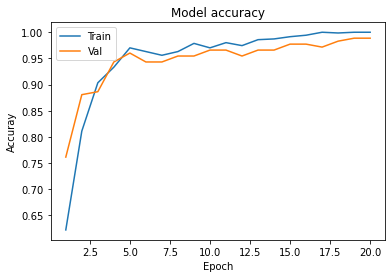

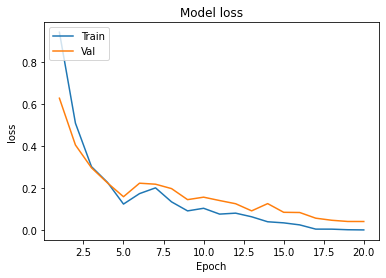

In [28]:
## learning curves
import matplotlib.pyplot as plt
epochs = 20
epoch_range = range(1,epochs+1)
#plotting traning & validation accuracy values
history.history.keys()
plt.plot(epoch_range, history.history['acc'])
plt.plot(epoch_range, history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuray')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()
#plotting training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [ ]:
## confusion matrix
#from mlxtend.plotting import plot_confusion_matrix
#from sklearn.metrics import confusion_matrix
#Y_predict = model.predict_classes(X_test)
#conf_mat = confusion_matrix(Y_test, Y_predict)
#plot_confusion_matrix(conf_mat = conf_mat, class_names = Y.classes_, show_normed = False)

In [29]:
Y_predict = model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_Matrix = confusion_matrix(Y_test, Y_predict)
confusion_Matrix

array([[44,  0,  0,  0],
       [ 0, 42,  1,  1],
       [ 0,  0, 44,  0],
       [ 0,  0,  0, 44]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report 
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, Y_predict)))
print('\nClassification Report\n')
print(classification_report(Y_test, Y_predict, target_names=['Sitting', 'Walking', 'PushUps', 'Falling']))


Accuracy: 0.99


Classification Report

              precision    recall  f1-score   support

     Sitting       1.00      1.00      1.00        44
     Walking       1.00      0.95      0.98        44
     PushUps       0.98      1.00      0.99        44
     Falling       0.98      1.00      0.99        44

    accuracy                           0.99       176
   macro avg       0.99      0.99      0.99       176
weighted avg       0.99      0.99      0.99       176



In [31]:
import pickle

In [32]:
pickle.dump(model, open('RNNmodel.pkl', 'wb'))

In [73]:
## making batches of input data of size 120 values with a gap of 30 values
import scipy.stats as stats
X = []
Y = []
buffer_size = 120
shift_size = 30
num_features = 34
X_frame = np.zeros((buffer_size,num_features))
for i in range(0, (len(X_scaled)-buffer_size), shift_size):
    #X_frame = np.zeros((buffer_size,num_features))
    #for j in range(0,num_features,1):
        #X_frame[:,j] = (X_scaled[:,j])[i:i+buffer_size]
    X_frame = X_Raw[i:i+buffer_size]
    label = stats.mode(Y_label[i:i+buffer_size])[0][0]
    X.append(X_frame)
    Y.append(label)
X = np.asarray(X).reshape(-1,buffer_size,num_features)
Y = np.asarray(Y)
X.shape,Y.shape
X[0]

array([[ 56.19069855, 296.2344854 ,  47.49573637, ..., 335.7749548 ,
        361.3385628 , 295.5867925 ],
       [ 58.07092819, 294.8304728 ,  50.43868441, ..., 335.4668686 ,
        361.1953245 , 295.5778289 ],
       [ 60.34748406, 293.2764335 ,  52.33679027, ..., 335.6378602 ,
        361.131568  , 295.3225484 ],
       ...,
       [166.628734  , 335.160583  , 161.4007248 , ..., 355.3305387 ,
        365.1155384 , 275.2251388 ],
       [166.4784055 , 335.484     , 161.1113609 , ..., 355.4633377 ,
        364.9437052 , 274.8744573 ],
       [165.7417374 , 336.8515123 , 160.6838382 , ..., 352.0715889 ,
        363.6049675 , 271.653604  ]])

In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() 
X0 = sc.fit_transform(X[0])
X0
XMean = X_Raw.mean(axis = 0)
#XStd = X_Raw.std(axis = 0)
#XScale = (X[1]-XMean)/XStd
#XScale
XMean
XStd

array([ 96.38779959, 127.16401286,  97.13470333, 129.87910693,
        95.74375047, 127.46249832,  93.7858246 , 129.05961629,
        90.41257012, 125.11638235,  87.46516144, 123.3528153 ,
        82.68437065, 115.98756097,  93.88162078, 126.86459209,
        88.92850539, 111.58051582, 106.44469339, 126.27066327,
       104.85191381, 111.8015252 ,  86.30759081, 119.30815504,
        84.94167523, 113.47366614,  91.67524166, 121.34462458,
        90.18384711, 115.57534719, 105.70870987, 131.18502572,
       104.6401585 , 126.9626246 ])

In [84]:
X0 = np.asarray(X[0]).reshape(-1,buffer_size, num_features)
X0

array([[[ 56.19069855, 296.2344854 ,  47.49573637, ..., 335.7749548 ,
         361.3385628 , 295.5867925 ],
        [ 58.07092819, 294.8304728 ,  50.43868441, ..., 335.4668686 ,
         361.1953245 , 295.5778289 ],
        [ 60.34748406, 293.2764335 ,  52.33679027, ..., 335.6378602 ,
         361.131568  , 295.3225484 ],
        ...,
        [166.628734  , 335.160583  , 161.4007248 , ..., 355.3305387 ,
         365.1155384 , 275.2251388 ],
        [166.4784055 , 335.484     , 161.1113609 , ..., 355.4633377 ,
         364.9437052 , 274.8744573 ],
        [165.7417374 , 336.8515123 , 160.6838382 , ..., 352.0715889 ,
         363.6049675 , 271.653604  ]]])

In [85]:
#print(Y_test)
#model.predict_classes(X_test[8:9])
model.predict_classes(X0)

array([0], dtype=int64)

In [ ]:
X_scaled[0:120]